In [1]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

# Visualisasi dan Deskripsi Data

In [2]:
# Memuat dan melihat contoh data
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Memunculkan summary statistics untuk data yang bersifat numerik
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# Melihat jumlah objek dari masing-masing kelas (nominal)
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

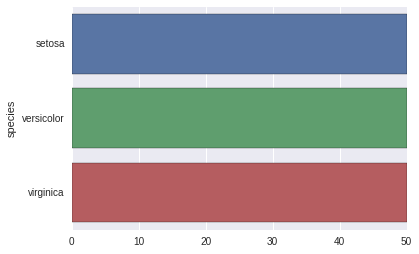

In [18]:
ax = sns.countplot(y='species', data=df)
plt.xlabel('')
plt.show()

In [5]:
# Mengelompokkan data berdasarkan kelasnya dan mencari nilai rataannya
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


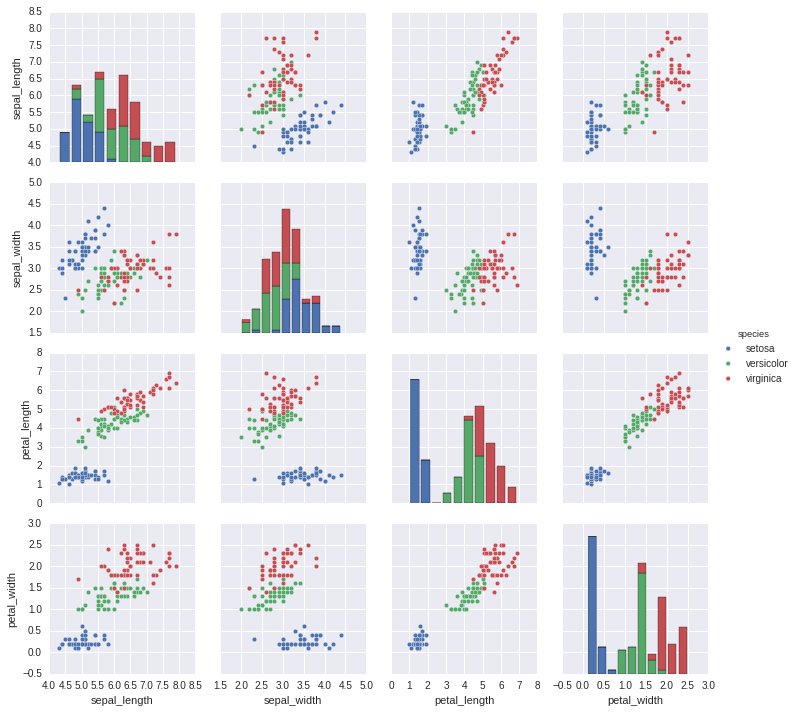

In [6]:
sns.pairplot(df, hue='species')
plt.show() # setiap pemanggilan plot dimunculkan dengan perintah ini

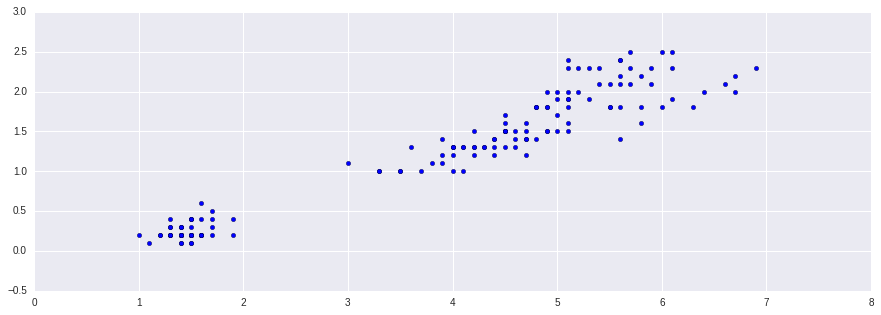

In [7]:
# Scatter plot untuk melihat sebaran objek berdasarkan dua variabel
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(df['petal_length'], df['petal_width'])
plt.show()

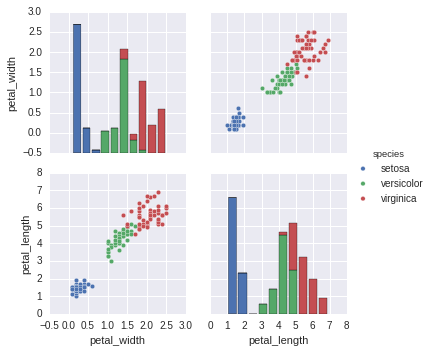

In [8]:
# Memilih beberapa atribut saja untuk dimunculkan, perhatikan bahwa ada dua tanda kurung siku!
sns.pairplot(df[['petal_width','petal_length','species']], hue='species')
plt.show()

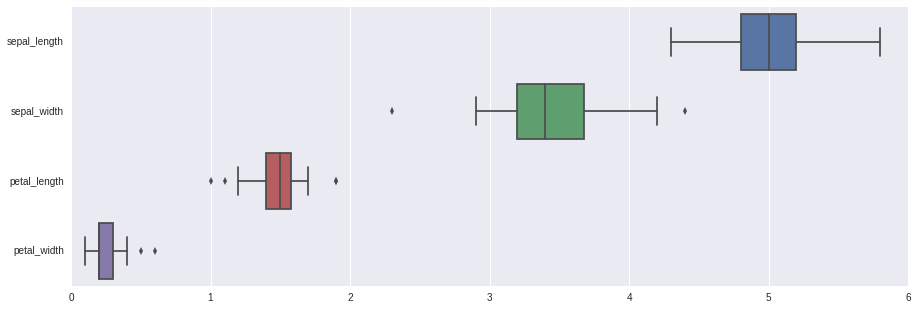

In [9]:
# Box plot untuk membandingkan atribut
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=df[df.species == 'setosa'], orient='h', ax=ax) # memilih salah satu kelas saja
plt.show()

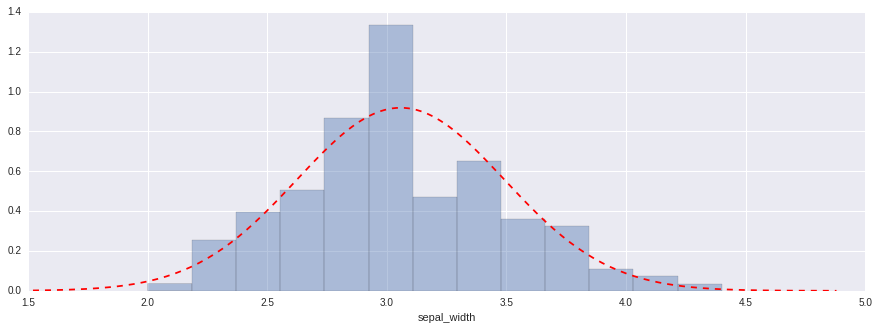

In [10]:
# Mencocokkan distribusi dengan Gaussian
fig, ax = plt.subplots(figsize=(15,5))
sns.distplot(df.sepal_width, fit=norm, kde=False, fit_kws={'color': 'r', 'linestyle': '--'})
plt.show()

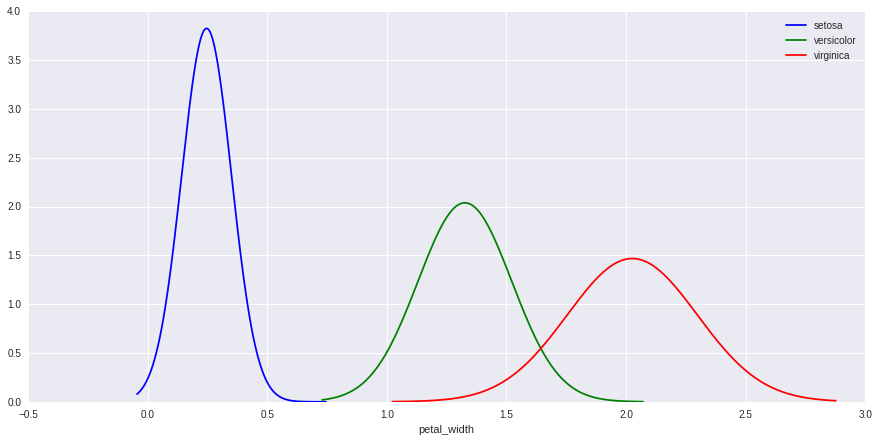

In [11]:
# Mencocokkan beberapa Gaussian untuk membedakan kelas
fig, ax = plt.subplots(figsize=(15,7))
sns.distplot(df[df.species == 'setosa'].petal_width, kde=False, hist=False, fit=norm, fit_kws={'color': 'b'}, label='setosa')
sns.distplot(df[df.species == 'versicolor'].petal_width, kde=False, hist=False, fit=norm, fit_kws={'color': 'g'}, label='versicolor')
sns.distplot(df[df.species == 'virginica'].petal_width, kde=False, hist=False, fit=norm, fit_kws={'color': 'r'}, label='virginica')
plt.legend()
plt.show()

# Manipulasi Data

In [12]:
df['sepal_length'].head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64

In [13]:
df.sepal_length.apply(np.floor).head()

0    5.0
1    4.0
2    4.0
3    4.0
4    5.0
Name: sepal_length, dtype: float64

In [14]:
df['sepal_length_mm'] = df['sepal_length'].apply(lambda x: x * 10).head()
df.columns

In [15]:
df.sepal_length_mm.head()

0    51.0
1    49.0
2    47.0
3    46.0
4    50.0
Name: sepal_length_mm, dtype: float64

In [16]:
del df['sepal_length_mm']
df.columns

In [22]:
df['petal_area'] = df['petal_length'] * df['petal_width']
df['petal_area'].head()

0    0.28
1    0.28
2    0.26
3    0.30
4    0.28
Name: petal_area, dtype: float64